# Fraction skill score 

Evaluate the performance of ensemble members considering the timing and spatial scales of precipitation using GPM IMERG as a reference dataset. 

In [1]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 

# save directory 
path = '/glade/u/home/kukulies/metrics/fss/'

import warnings 
warnings.filterwarnings('ignore')

In [2]:
def make_subplot(threshold, fnames, subplot, names):
    """
    Function to create subplot for FSS. 
    
    Args: 
        threshold(int): precipitation threshold 
        fnames(list): list with filenames for FSS distribution of each experiment to plot 
        subplot(int): number of subplot 
    """
    # get U and R 
    fss_uniform = np.load(path + str(threshold)+'_FSSuniform.npy')
    fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')
    # make subplot 
    ax = plt.subplot(2, 2, subplot)
    palette = sns.color_palette("Spectral", 4)
    spatial_scales = np.arange(100)
    colors = ['darkred', 'coral', 'violet', 'dodgerblue','teal',  'lightseagreen']
    c = 0
    fs = 18

    for fname in fnames:
        fss= np.load(path +fname)
        ax.plot(spatial_scales, fss, color = colors[c], label =names[c], linewidth = 4.5)
        c+= 1 
        plt.rc('ytick', labelsize=20)
        
    #ax.axhline(y=fss_uniform, color='black', linestyle='dotted', linewidth = 2)
    #ax.axhline(y=fss_random, color='black', linestyle='dotted', linewidth= 2)
    ax.legend(loc = 'lower right', fontsize= fs)

    ax.text(5, 0.8, str(str(threshold) + ' mm h$^{-1}$'), fontsize= 28, color = 'black')
    ax.text(5, fss_uniform+ 0.02, 'FSS$_{uniform}$', fontsize= fs)
    ax.text(5, fss_random+ 0.02, 'FSS$_{random}$' , fontsize= fs)
    ax.set_xticks(spatial_scales[10::10])
    ax.set_xticklabels( spatial_scales[10::10]*10, fontsize= fs)
    ax.set_yticks(np.arange(0,0.9,0.1))
    ax.set_xlabel('horizontal scale [km]', fontsize= fs)
    ax.set_ylabel('median FSS of hourly precip fields', fontsize= fs)
    ax.set_xlim(0,99.5)
    ax.set_ylim(0,0.9)
    ax.grid()
    plt.grid()

## Comparison of the three NCAR simulations 

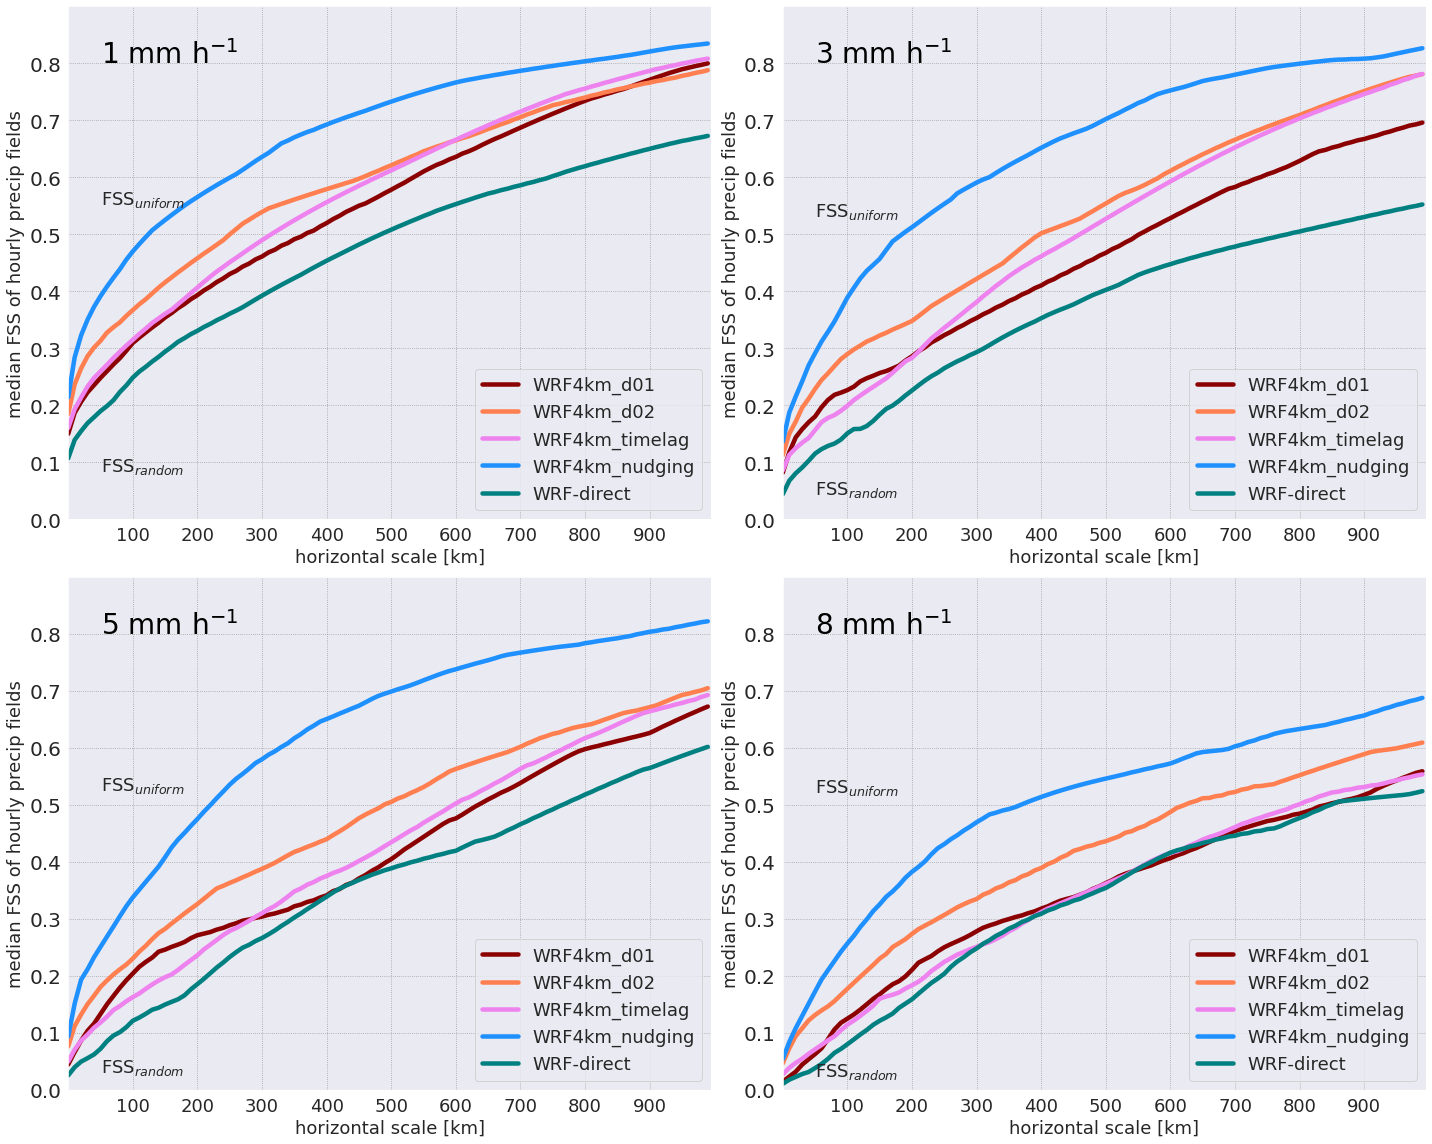

In [6]:
fig = plt.figure(figsize=(20,16))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sp=0
# 'WRF12km'+ str(threshold)+'_20-21.npy' 


for threshold in [1,3, 5 , 8]:
    sp+=1 
    fnames = ['WRF4km_d01'+ str(threshold)+'_20-21.npy', 'WRF4km_d02'+ str(threshold)+'_20-21.npy',   'WRF4km_timelag'+ str(threshold)+'_20-21.npy','WRF4km_spectral'+ str(threshold)+'_20-21.npy' ,'WRF-direct'+ str(threshold)+'_20-21.npy']
    make_subplot(threshold, fnames, sp, ['WRF4km_d01', 'WRF4km_d02', 'WRF4km_timelag','WRF4km_nudging', 'WRF-direct'])

plt.tight_layout()
plt.savefig('plots/fraction_skill_score_MCS_20-21.png', transparent = False, facecolor = 'white' )
            

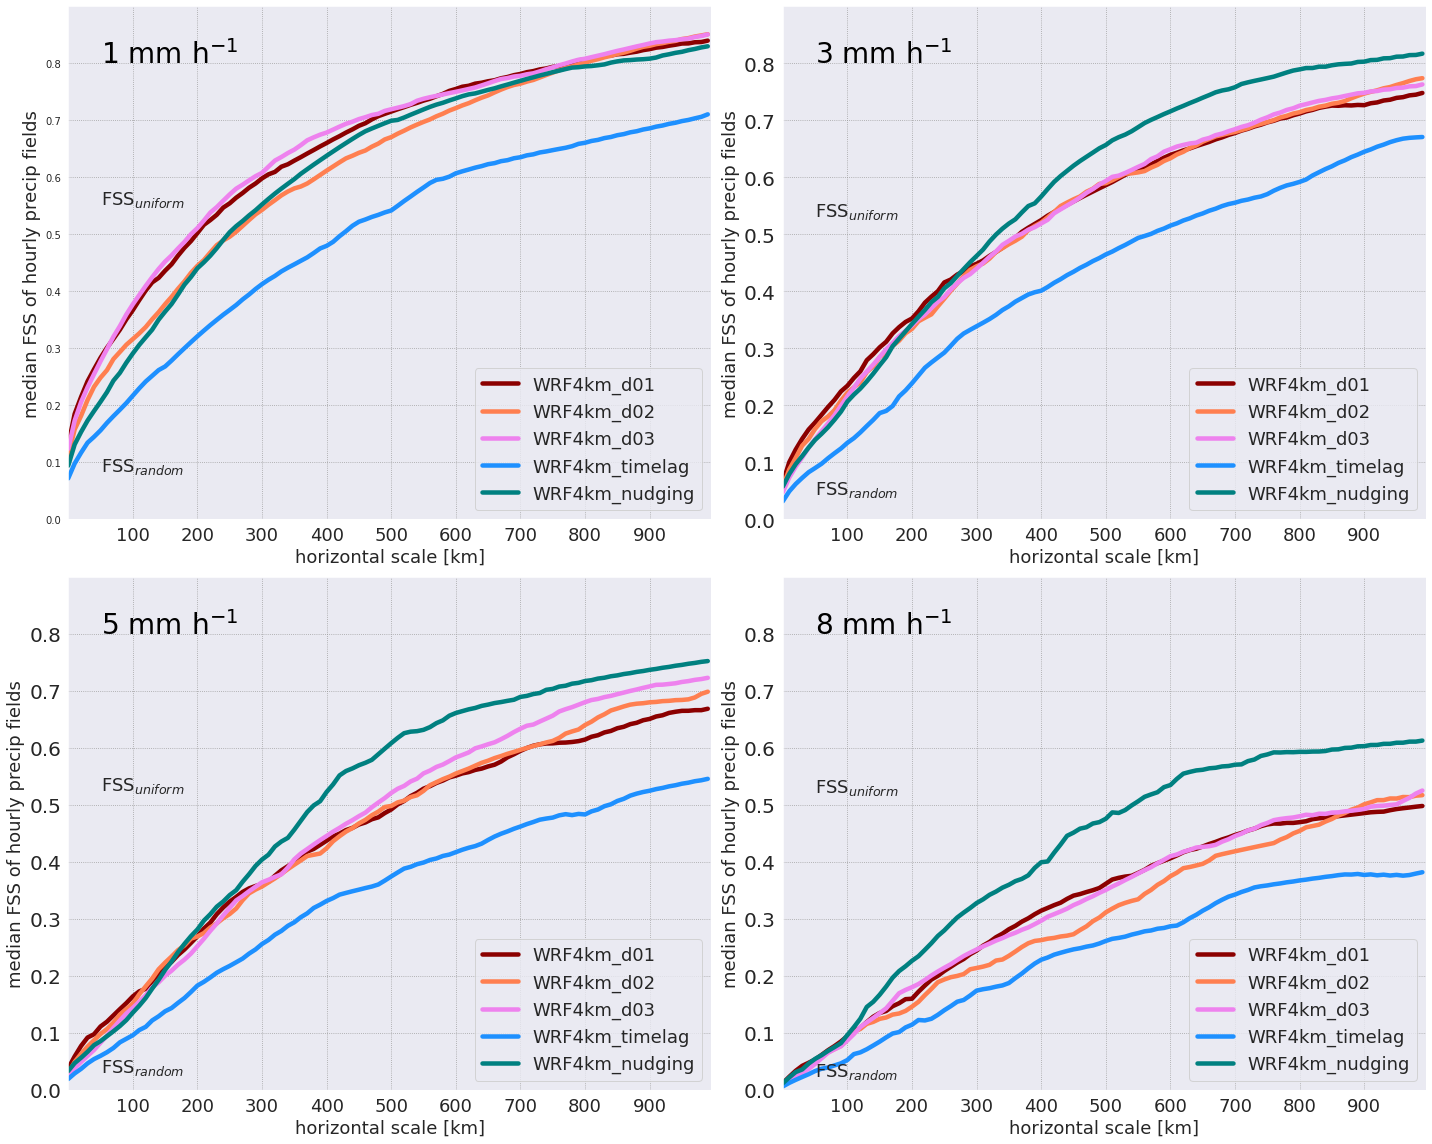

In [5]:
fig = plt.figure(figsize=(20,16))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sp=0
# 'WRF12km'+ str(threshold)+'_20-21.npy' 


for threshold in [1,3, 5 , 8]:
    sp+=1 
    fnames = ['WRF4km_d01'+ str(threshold)+'_14-24.npy', 'WRF4km_d02'+ str(threshold)+'_14-24.npy',   'WRF4km_d03'+ str(threshold)+'_14-24.npy',  'WRF4km_timelag'+ str(threshold)+'_14-24.npy','WRF4km_nudging'+ str(threshold)+'_14-24.npy' ]
    make_subplot(threshold, fnames, sp, ['WRF4km_d01', 'WRF4km_d02', 'WRF4km_d03', 'WRF4km_timelag','WRF4km_nudging'])

plt.tight_layout()
plt.savefig('plots/fraction_skill_score_MCS_14-24.png', transparent = False, facecolor = 'white' )
            

## Fraction skill cores of event only (20-21 July )

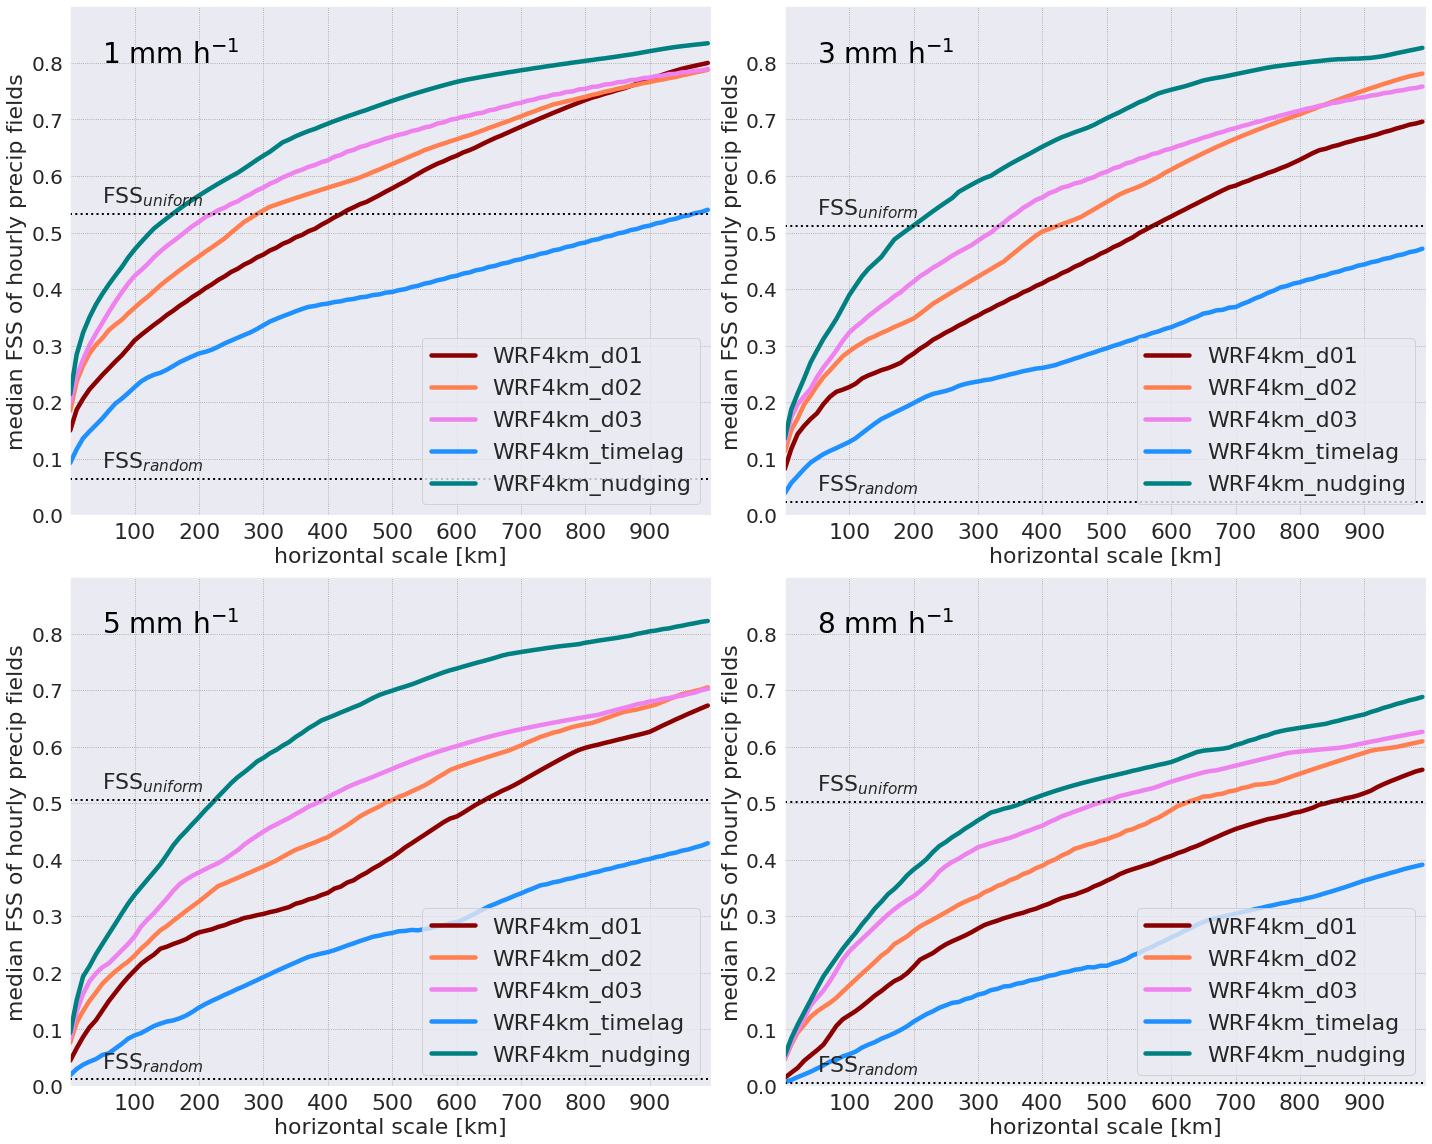

In [10]:
fig = plt.figure(figsize=(20,16))

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

sp=0

# 'WRF12km'+ str(threshold)+'_20-21.npy' 

for threshold in [1,3, 5 , 8]:

    sp+=1 

    fnames = ['WRF4km_d01'+ str(threshold)+'_20-21.npy', 'WRF4km_d02'+ str(threshold)+'_20-21.npy',   'WRF4km_5deg'+ str(threshold)+'_20-21.npy',  'WRFkm_timelag'+ str(threshold)+'_20-21.npy','WRF4km_spectral'+ str(threshold)+'_20-21.npy' ]

    make_subplot(threshold, fnames, sp, ['WRF4km_d01', 'WRF4km_d02', 'WRF4km_d03', 'WRF4km_timelag','WRF4km_nudging'])



plt.tight_layout()
plt.savefig('plots/fraction_skill_score_MCS_20-21.png', transparent = False, facecolor = 'white' )

        

## Comparison of all ensemble members color-coded based on different factors

- model 
- domain size 
- grid cell size 

In [5]:
# legend without duplicates 
def legend_no_duplicates(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), fontsize = 14, loc = 'upper right')

In [6]:
def plot_ensemble(thresholds, path, rows, cols ):
    """
    Function to create subplot for FSS. 
    
    Args: 
        threshold(int): precipitation threshold 
        fnames(list): list with filenames for FSS distribution of each experiment to plot 
        subplot(int): number of subplot 
    """
    
    ######## models ########
    models = dict()
    
    # customize 
    palette = sns.color_palette("Spectral", 4)
    spatial_scales = np.arange(100)
    colors = ['lightblue',  'cornflowerblue', 'darkblue', 'deeppink', 'plum']
    fs = 18
    subplot = 1 
    
    for threshold in thresholds: 
        models['WRF']  = list(Path(path).glob('*WRF*'+ str(threshold)+'.npy'))
        models['RegCM'] = list(Path(path).glob('*Reg*'+ str(threshold)+'.npy'))
        models['ICON'] = list(Path(path).glob('*ICON*'+ str(threshold)+'.npy'))
        models['MPAS'] = list(Path(path).glob('*MPAS*'+ str(threshold)+'.npy'))
        models['CCLM'] = list(Path(path).glob('*CCLM*'+ str(threshold)+'.npy'))
        c= -1
        ax = plt.subplot(rows, cols, subplot)
        # get U and R 
        fss_uniform = np.load(path +  str(threshold)+'_FSSuniform.npy')
        fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')      

        for subgroup in models.keys():
            c+= 1
            for fname in models[subgroup]:
                fss= np.load(fname)
                ax.plot(spatial_scales, fss, color = colors[c], label = subgroup, linewidth = 3.0)
                

        ax.axhline(y=fss_uniform, color='black', linestyle='dotted', linewidth = 2)
        ax.axhline(y=fss_random, color='black', linestyle='dotted', linewidth= 2)
        subplot+=1 
        
        if threshold== 8:
            legend_no_duplicates(ax)
        ax.grid()
        
        #ax.text(5, 0.8, str(str(threshold) + ' mm h$^{-1}$'), fontsize= 20, color = 'black')
        ax.set_title(str(threshold) + r'mm h$^{-1}$', fontsize= 22)
        ax.text(5, fss_uniform+ 0.02, 'FSS$_{uniform}$', fontsize= fs)
        ax.text(5, fss_random+ 0.02, 'FSS$_{random}$' , fontsize= fs)
        ax.set_xticks(spatial_scales[10::10])
        ax.set_xticklabels( spatial_scales[10::10]*10, fontsize= fs)
        ax.set_yticks(np.arange(0,0.9,0.1))
        if threshold == 1:
            ax.set_ylabel('median FSS of hourly precip fields', fontsize= fs)
        ax.set_xlim(0,99.5)
        ax.set_ylim(0,0.9)
        
    ######## domain size ########
    domain = dict()
    
    # customize 
    spatial_scales = np.arange(100)
    colors = ['lightblue',  'darkblue', 'deeppink']
    fs = 16
    
    for threshold in thresholds: 
        domain['D2'] = list(Path(path).glob('*WRF*'+ str(threshold)+'.npy')) + list(Path(path).glob('*RegCM*'+ str(threshold)+'.npy')) + list(Path(path).glob('*ICON*'+ str(threshold)+'.npy ')) + list(Path(path).glob('*MPAS*'+ str(threshold)+'.npy')) 
        domain['WRF4kmL']  = list(Path(path).glob('*r1i2p1*NCAR*'+ str(threshold)+'.npy'))
        domain['CCLM'] = list(Path(path).glob('*CCLM*'+ str(threshold)+'.npy'))
        c= -1
        ax = plt.subplot(rows, cols, subplot)
        # get U and R 
        fss_uniform = np.load(path +  str(threshold)+'_FSSuniform.npy')
        fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')      

        for subgroup in domain.keys():
            c+= 1
            for fname in domain[subgroup]:
                fss= np.load(fname)
                ax.plot(spatial_scales, fss, color = colors[c], label = subgroup, linewidth = 3.0)
                

        ax.axhline(y=fss_uniform, color='black', linestyle='dotted', linewidth = 2)
        ax.axhline(y=fss_random, color='black', linestyle='dotted', linewidth= 2)
        subplot+=1 
        
        if threshold== 8:
            legend_no_duplicates(ax)
        ax.grid()

        #ax.text(5, 0.8, str(str(threshold) + ' mm h$^{-1}$'), fontsize= 20, color = 'black')
        ax.text(5, fss_uniform+ 0.02, 'FSS$_{uniform}$', fontsize= fs)
        ax.text(5, fss_random+ 0.02, 'FSS$_{random}$' , fontsize= fs)
        ax.set_xticks(spatial_scales[10::10])
        ax.set_xticklabels( spatial_scales[10::10]*10, fontsize= fs)
        ax.set_yticks(np.arange(0,0.9,0.1))
        if threshold == 1:
            ax.set_ylabel('median FSS of hourly precip fields', fontsize= fs)
        ax.set_xlim(0,99.5)
        ax.set_ylim(0,0.9)
        
    ######## grid spacing #########
    grid = dict()
    
    # customize 
    spatial_scales = np.arange(100)
    colors = ['lightblue',  'darkblue', 'deeppink']
    fs = 16
    
    for threshold in thresholds: 
        grid['4km']  = list(Path(path).glob('*WRF*'+ str(threshold)+'.npy'))+ list(Path(path).glob('*Reg*'+ str(threshold)+'.npy')) + list(Path(path).glob('*CCLM*'+ str(threshold)+'.npy'))
        grid[r'0.03$^\circ$ '] = list(Path(path).glob('*MPAS*'+ str(threshold)+'.npy'))+ list(Path(path).glob('*ICON*'+ str(threshold)+'.npy'))
        grid['12km'] = list(Path(path).glob('*12km*'+ str(threshold)+'.npy'))
        c= -1
        ax = plt.subplot(rows, cols, subplot)
        # get U and R 
        fss_uniform = np.load(path +  str(threshold)+'_FSSuniform.npy')
        fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')      

        for subgroup in grid.keys():
            c+= 1
            for fname in grid[subgroup]:
                fss= np.load(fname)
                ax.plot(spatial_scales, fss, color = colors[c], label = subgroup, linewidth = 3.0)
                
        ax.axhline(y=fss_uniform, color='black', linestyle='dotted', linewidth = 2)
        ax.axhline(y=fss_random, color='black', linestyle='dotted', linewidth= 2)
        subplot+=1 
        
        if threshold== 8:
            legend_no_duplicates(ax)
        ax.grid()

        #ax.text(5, 0.8, str(str(threshold) + ' mm h$^{-1}$'), fontsize= 20, color = 'black')
        ax.text(5, fss_uniform+ 0.02, 'FSS$_{uniform}$', fontsize= fs)
        ax.text(5, fss_random+ 0.02, 'FSS$_{random}$' , fontsize= fs)
        ax.set_xticks(spatial_scales[10::10])
        ax.set_xticklabels( spatial_scales[10::10]*10, fontsize= fs)
        ax.set_yticks(np.arange(0,0.9,0.1))
        ax.set_xlim(0,99.5)
        ax.set_ylim(0,0.9) 
        if threshold == 1:
            ax.set_ylabel('median FSS of hourly precip fields', fontsize= fs)
        ax.set_xlabel('horizontal scale [km]', fontsize= fs) 
        plt.rc('ytick', labelsize=20) 

In [ ]:
fig = plt.figure(figsize=(22,15))
thresholds = [1, 3, 5, 8]

plot_ensemble(thresholds,path, 3, 4 )

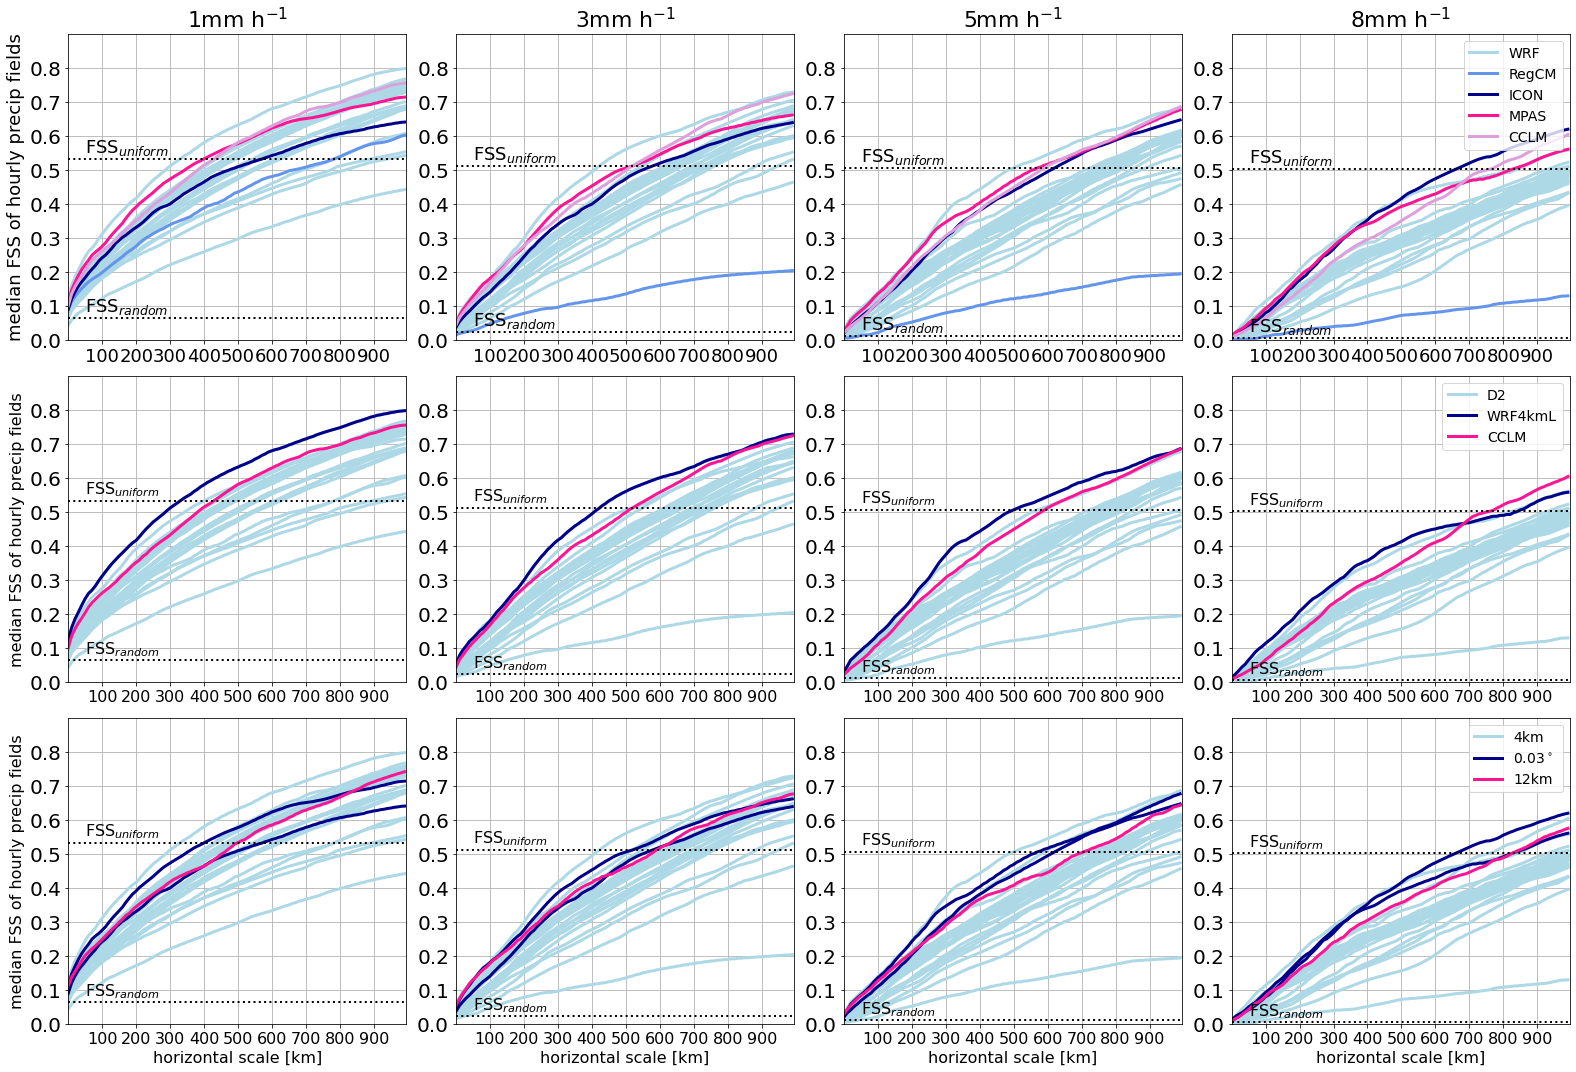

In [50]:
)
    
plt.tight_layout()
plt.savefig('plots/fraction_skill_score_ensemble.png')

## Compare WRF spread, models and new experiments 

In [10]:
def make_subplot(threshold, fnames, subplot, names):
    """
    Function to create subplot for FSS. 
    
    Args: 
        threshold(int): precipitation threshold 
        fnames(list): list with filenames for FSS distribution of each experiment to plot 
        subplot(int): number of subplot 
    """
    lw = 3.5
    # get U and R 
    fss_uniform = np.load(path + str(threshold)+'_FSSuniform.npy')
    fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')
    # make subplot 
    ax = plt.subplot(4, 2, subplot)
    palette = sns.color_palette("Spectral", 4)
    spatial_scales = np.arange(100)
    colors = ['mediumaquamarine','mediumaquamarine' , 'cornflowerblue', 'cornflowerblue', 'cornflowerblue','powderblue',  'darkslateblue']
    linestyles = ['--', '-', 'dotted', 'dashed', '-', '-', '-']
    if len(names) ==1:
        colors=['darkslateblue']
        linestyles=['-']
        
    c = 0
    fs = 18

    for fname in fnames:
        fss= np.load(path +fname)
        ax.plot(spatial_scales, fss, color = colors[c], label =names[c], linewidth = lw, linestyle= linestyles[c])
        c+= 1 
        plt.rc('ytick', labelsize=20)

    ax.legend(loc = 'lower right', fontsize= fs)

    ax.text(5, 0.8, str(str(threshold) + ' mm h$^{-1}$'), fontsize= 28, color = 'black')
    ax.text(5, fss_uniform+ 0.02, 'FSS$_{uniform}$', fontsize= fs)
    ax.text(5, fss_random+ 0.02, 'FSS$_{random}$' , fontsize= fs)
    ax.set_xticks(spatial_scales[10::10])
    ax.set_xticklabels( spatial_scales[10::10]*10, fontsize= fs)
    ax.set_yticks(np.arange(0,0.9,0.1))
    ax.set_xlabel('horizontal scale [km]', fontsize= fs)
    ax.set_ylabel('median FSS of hourly precip fields', fontsize= fs)
    ax.set_xlim(0,99.5)
    ax.set_ylim(0,0.9)
    ax.grid()
    plt.grid()

In [14]:
def make_subplot_model(threshold, fnames, subplot, names):
    """
    Function to create subplot for FSS. 
    
    Args: 
        threshold(int): precipitation threshold 
        fnames(list): list with filenames for FSS distribution of each experiment to plot 
        subplot(int): number of subplot 
    """
    lw = 4.0
    # get U and R 
    fss_uniform = np.load(path + str(threshold)+'_FSSuniform.npy')
    fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')
    # make subplot 
    ax = plt.subplot(4, 2, subplot)
    palette = sns.color_palette("Spectral", 4)
    spatial_scales = np.arange(100)
    colors = [ 'orchid', 'thistle','moccasin', 'darkorange', 'firebrick' ]

    c = 0
    fs = 18

    for fname in fnames:
        fss= np.load(fname)
        ax.plot(spatial_scales, fss, color = colors[c], label =names[c], linewidth = lw, linestyle = '-')
        c+= 1 
        plt.rc('ytick', labelsize=20)

    ax.legend(loc = 'lower right', fontsize= fs)

    ax.text(5, 0.8, str(str(threshold) + ' mm h$^{-1}$'), fontsize= 28, color = 'black')
    ax.text(5, fss_uniform+ 0.02, 'FSS$_{uniform}$', fontsize= fs)
    ax.text(5, fss_random+ 0.02, 'FSS$_{random}$' , fontsize= fs)
    ax.set_xticks(spatial_scales[10::10])
    ax.set_xticklabels( spatial_scales[10::10]*10, fontsize= fs)
    ax.set_yticks(np.arange(0,0.9,0.1))
    ax.set_xlabel('horizontal scale [km]', fontsize= fs)
    ax.set_ylabel('median FSS of hourly precip fields', fontsize= fs)
    ax.set_xlim(0,99.5)
    ax.set_ylim(0,0.9)
    ax.grid()
    plt.grid()

In [6]:
def plot_spread(threshold, fnames, subplot, label ,col = 'lightgrey'):
    ax = plt.subplot(4, 2, subplot)
    
    import seaborn as sns 
    import glob 
    ensnumber = len(fnames)

    x_max = np.zeros((10,))
    x_min  = np.arange(10**2, 10**7)
    color = 'darkblue'
    spatial_scales = np.arange(100)
    
    
    for i in np.arange(ensnumber):
        fname = str(fnames[i].stem)
        if 'r1i3' in fname or 'r1i4' in fname:
            continue
        x= np.load(fnames[i])
        #ax.plot(spatial_scales, x, color = colors[i], lw = 2.0 , linestyle = 'dotted')
        if x.sum() > x_max.sum():
            x_max = x
            key1= fname
        if x.sum()< x_min.sum():
            x_min = x
            key2= fname
       
    # lines for experiment with maximum und minimum skills
    #ax.plot(spatial_scales, x_max, color = col,  linewidth = 2.5, linestyle = 'dashed')
    #ax.plot(spatial_scales, x_min, color = col,  linewidth = 2.5, linestyle = 'dashed')
    
    # grey shading between maximum and minimum FSS dor physics options 
    ax.fill_between(spatial_scales, x_min, x_max, color = col, alpha = 0.3, label = label)
  
    ax.axhline(y=fss_uniform, color='black', linestyle='dashed', linewidth = 2)
    ax.axhline(y=fss_random, color='black', linestyle='dashed', linewidth= 2)

    ax.text(5, 0.8, str(str(threshold) + ' mm h$^{-1}$'), fontsize= 28, color = 'black')
    ax.text(5, fss_uniform+ 0.02, 'FSS$_{uniform}$', fontsize= 18)
    ax.text(5, fss_random+ 0.02, 'FSS$_{random}$' , fontsize= 18)
    ax.set_xticks(spatial_scales[10::10])
    ax.set_xticklabels( spatial_scales[10::10]*10, fontsize= 20)
    ax.set_yticks(np.arange(0,0.9,0.1))
    ax.set_xlabel('horizontal scale [km]', fontsize= 22)
    ax.set_ylabel('median FSS of hourly precip fields', fontsize= 22)
    ax.set_xlim(0,99.5)
    ax.set_ylim(0,0.9)
    plt.rc('ytick', labelsize=20) 
    ax.legend(loc = 'lower right', fontsize= 17)
    ax.grid()
    plt.grid()

In [32]:
#  Path('/glade/u/home/kukulies/data/metrics/fss/r1i3p1_PNNL-MPAS7.0P'+str(threshold)+'_20-21.npy') ,
#  Path('/glade/u/home/kukulies/data/metrics/fss/r1i2p1_PNNL-MPAS7.0P'+str(threshold)+'_20-21.npy') 
#  Path('/glade/u/home/kukulies/data/metrics/fss/r1i1p1_PNNL-MPAS7.0P'+str(threshold)+'_20-21.npy') ,

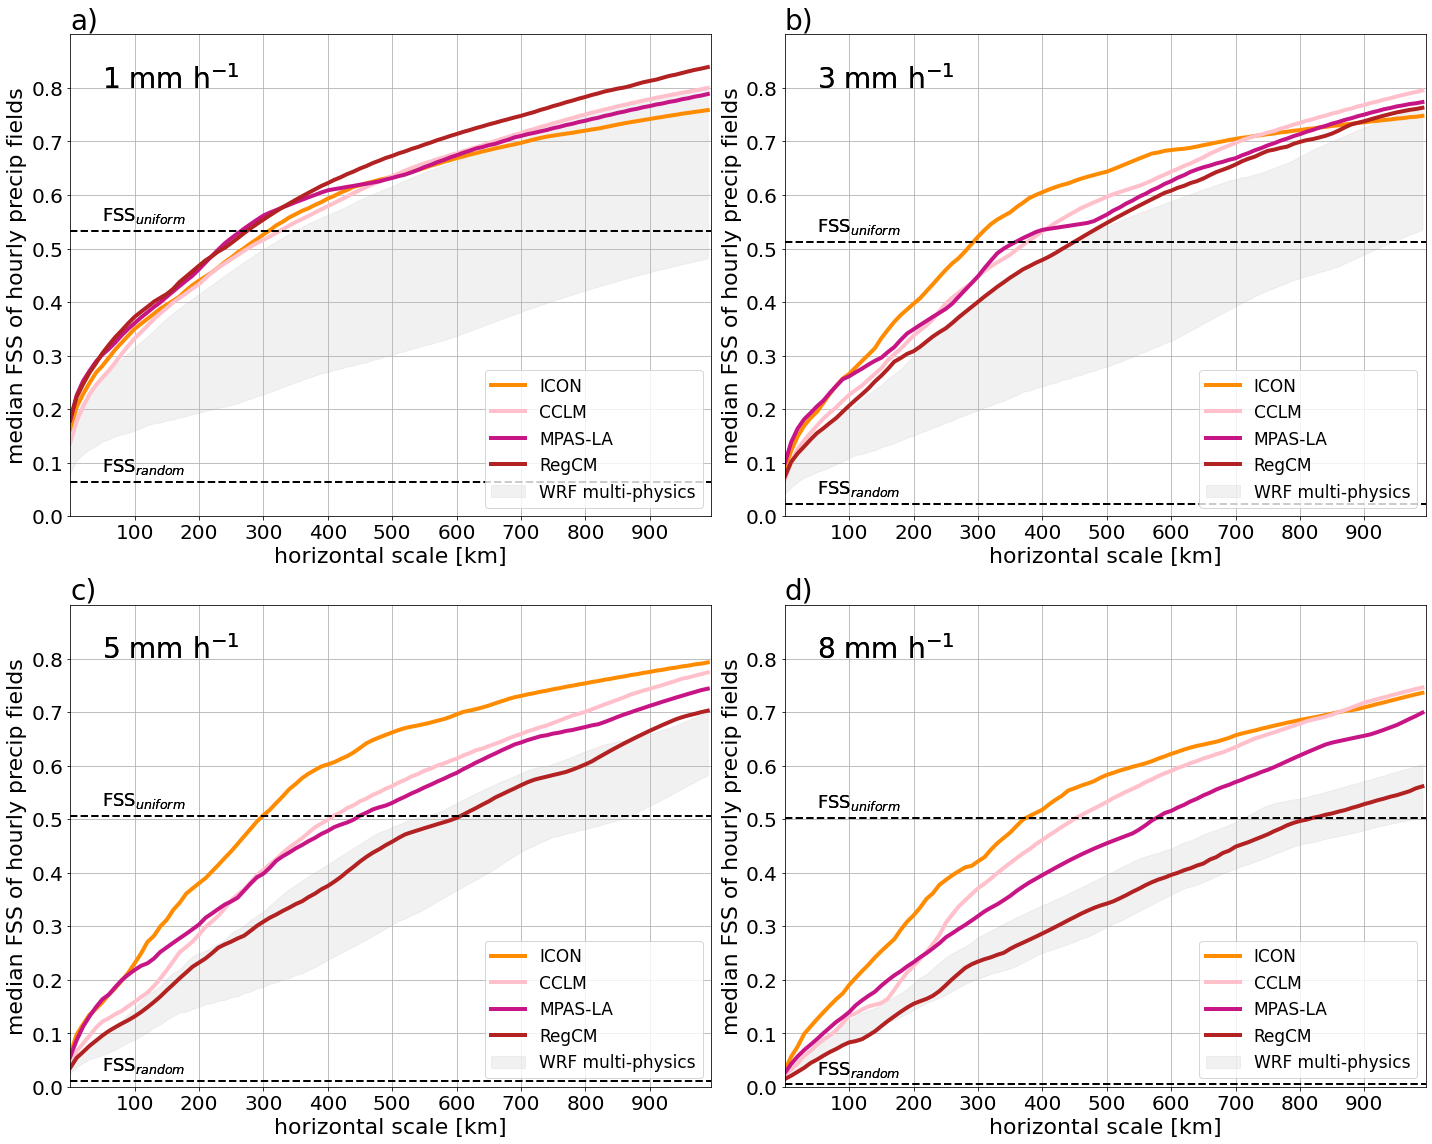

In [8]:
### make figure with one subplot per threshold ### 

fig = plt.figure(figsize=(20,16))
letter = ['a)', 'b)', 'c)', 'd)']
sp=0
for threshold in [1, 3, 5, 8]:
    sp+=1
    
    # spread for whole WRF ensemble (in total 26)
    fnames= list(Path(path).glob('r1*WRF*'+ str(threshold)+'_20-21.npy'))
    fss_uniform = np.load(path+ str(threshold)+'_FSSuniform.npy')
    fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')
    
    # add lines for additional experiments 
    wrf_fnames= ['WRF8km'+ str(threshold)+'_20-21.npy', 'WRF8km_vertical'+ str(threshold)+'_20-21.npy', 'WRF4km_d01'+ str(threshold)+'_20-21.npy', 'WRF4km_d02'+ str(threshold)+'_20-21.npy',   'WRF4km_5deg'+ str(threshold)+'_20-21.npy','WRF4km_spectral'+ str(threshold)+'_20-21.npy']
    #make_subplot(threshold, wrf_fnames, sp, ['WRF$_{8km}$','WRF$_{8km-vertical}$', 'WRF$_{D1}$', 'WRF$_{D2}$', 'WRF$_{D3}$','WRF$_{nudging}$'])

    # spread for non-WRF models (in total 6)
    models = [ Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_IAP-CAS-ICON2.6.1P'+ str(threshold) +'_20-21.npy'),
          Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_UIBK-CCLM50n1P'+str(threshold)+'_20-21.npy'),
          Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_PNNL-MPASLA7.0P'+str(threshold)+'_20-21.npy'),
        Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_IITM-RegCM480'+str(threshold)+'_20-21.npy')]
    #plot_spread(threshold, models, sp,  label= 'multi-model', col = 'skyblue',)
    make_subplot_model(threshold, models, sp, [ 'ICON','CCLM','MPAS-LA', 'RegCM'])
    # add WRF multi-physics spread 
    plot_spread(threshold, fnames, sp, 'WRF multi-physics')
    plt.title(letter[sp-1], loc = 'left', fontsize = 28)
    plt.grid()
    
plt.tight_layout()
plt.savefig('fss_ensemble_models.png', facecolor = 'white', transparent = False)

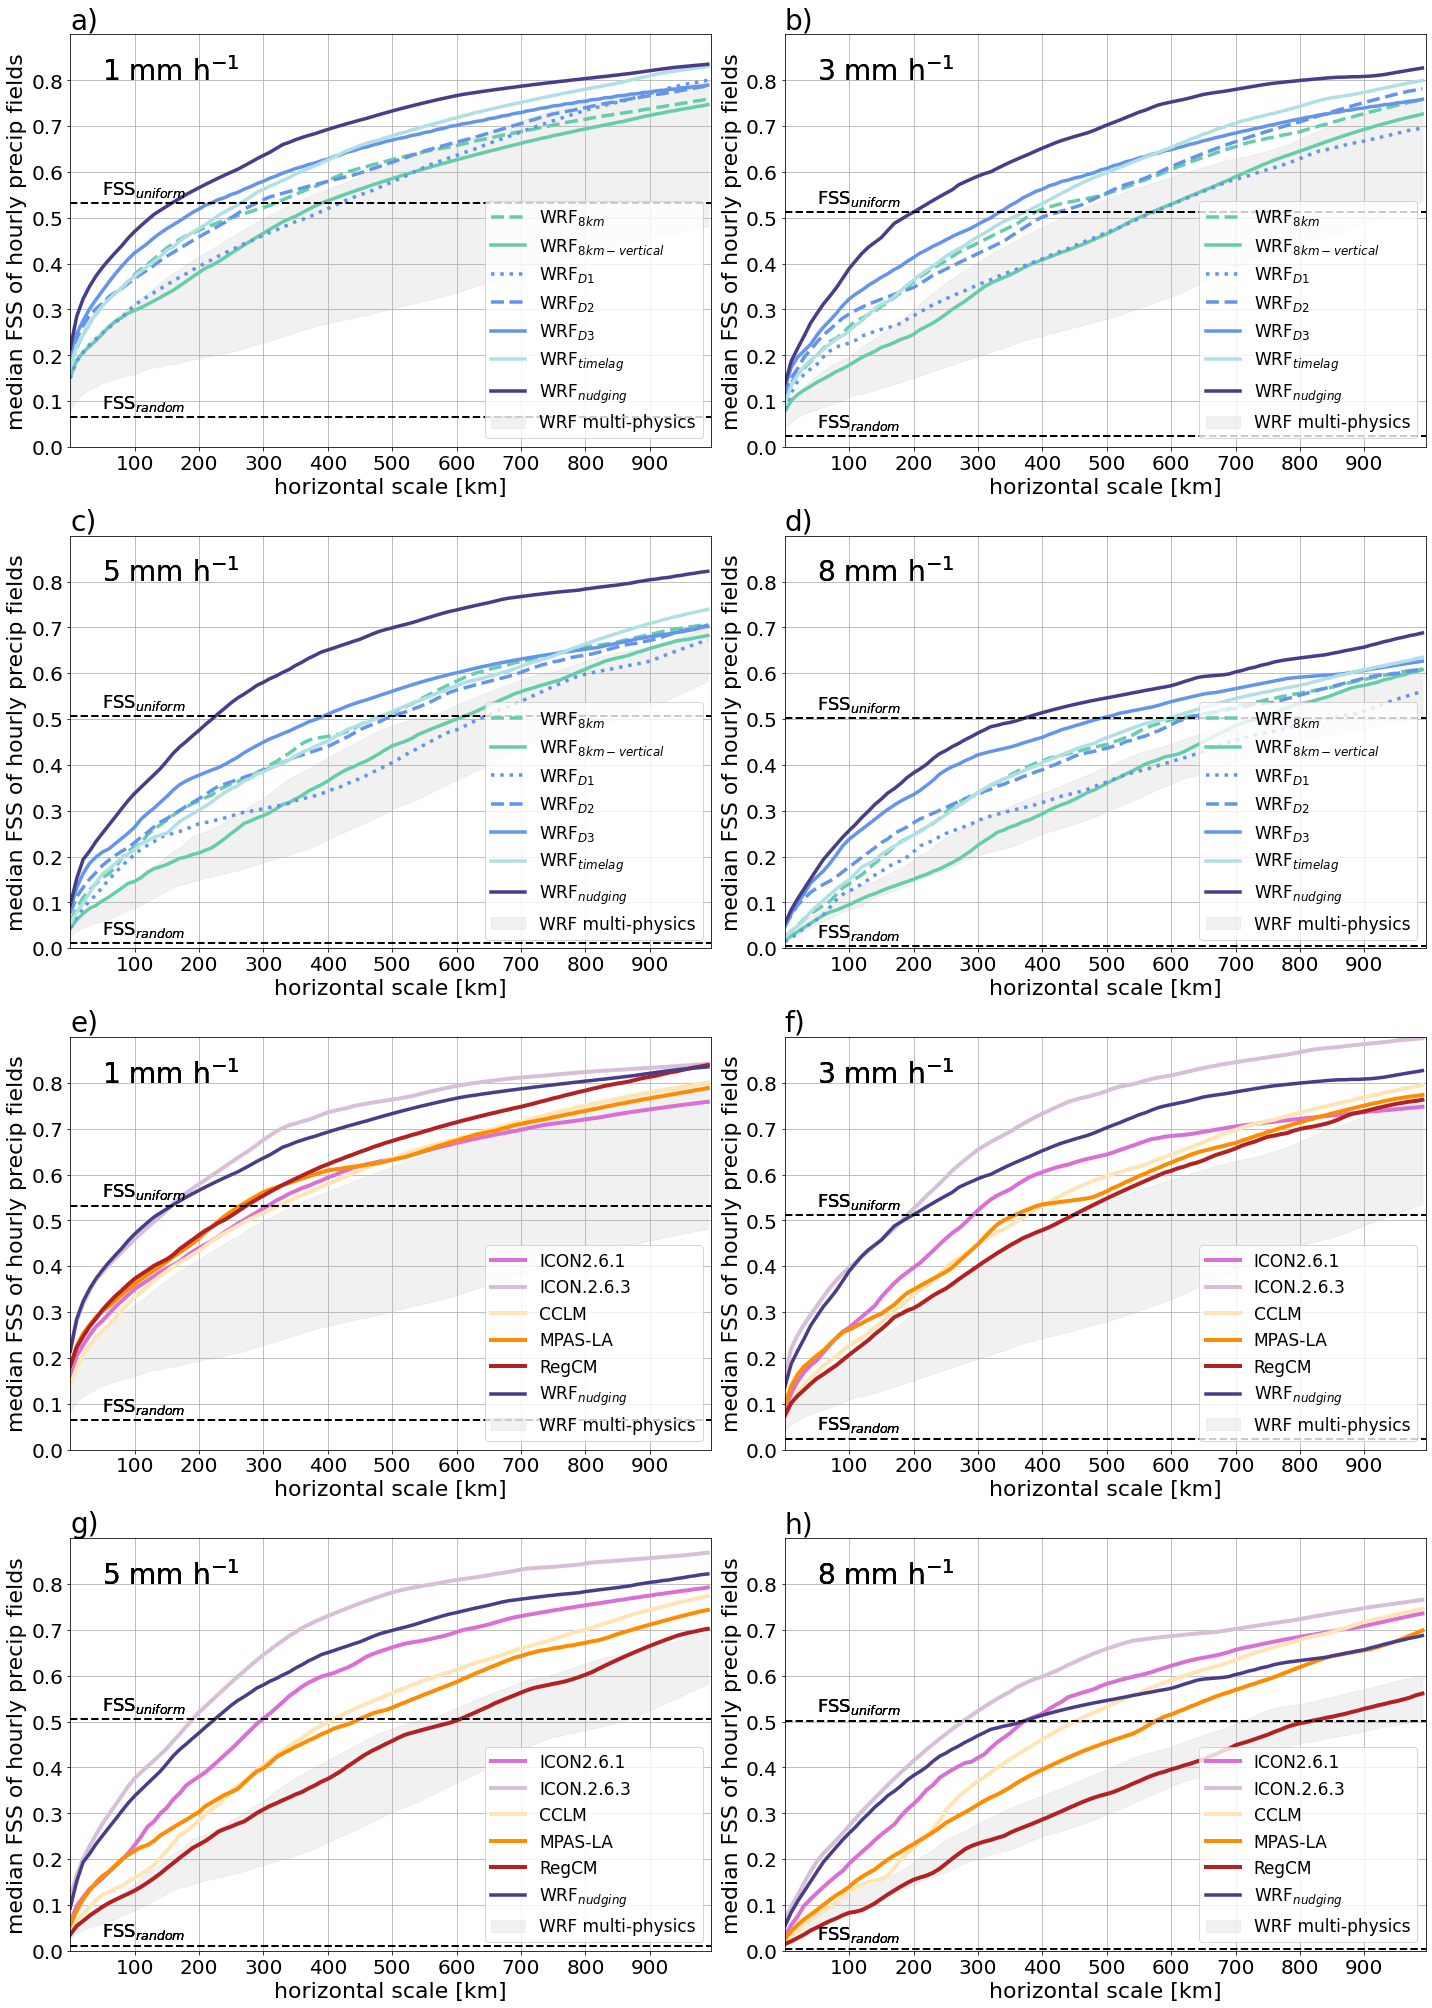

In [15]:
### make figure with one subplot per threshold ### 

fig = plt.figure(figsize=(20,28))


letter = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']
sp=0

##### plot all WRF experiments #####
for threshold in [1, 3, 5, 8]:
    sp+=1
    # spread for whole WRF ensemble (in total 26)
    fnames= list(Path(path).glob('r1*WRF*'+ str(threshold)+'_20-21.npy'))
    fss_uniform = np.load(path+ str(threshold)+'_FSSuniform.npy')
    fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')
    
    # add lines for additional experiments 
    wrf_fnames= ['WRF8km'+ str(threshold)+'_20-21.npy', 'WRF8km_vertical'+ str(threshold)+'_20-21.npy', 'WRF4km_d01'+ str(threshold)+'_20-21.npy', 'WRF4km_d02'+ str(threshold)+'_20-21.npy',   
                 'WRF4km_5deg'+ str(threshold)+'_20-21.npy', 'WRF4km-timelag'+ str(threshold)+'_20-21.npy', 'WRF4km_spectral'+ str(threshold)+'_20-21.npy']
    make_subplot(threshold, wrf_fnames, sp, ['WRF$_{8km}$','WRF$_{8km-vertical}$', 'WRF$_{D1}$', 'WRF$_{D2}$', 'WRF$_{D3}$','WRF$_{timelag}$','WRF$_{nudging}$'])
    plot_spread(threshold, fnames, sp, 'WRF multi-physics')
    plt.title(letter[sp-1], loc = 'left', fontsize = 28)
    plt.grid()
    
    
    
##### plot all other models#####
for threshold in [1, 3, 5, 8]:
    sp+=1
    
    # spread for whole WRF ensemble (in total 26)
    fnames= list(Path(path).glob('r1*WRF*'+ str(threshold)+'_20-21.npy'))
    fss_uniform = np.load(path+ str(threshold)+'_FSSuniform.npy')
    fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')
    
    # add lines for additional experiments 
    wrf_fnames= ['WRF8km'+ str(threshold)+'_20-21.npy', 'WRF8km_vertical'+ str(threshold)+'_20-21.npy', 'WRF4km_d01'+ str(threshold)+'_20-21.npy', 'WRF4km_d02'+ str(threshold)+'_20-21.npy',   'WRF4km_5deg'+ str(threshold)+'_20-21.npy','WRF4km_spectral'+ str(threshold)+'_20-21.npy']
    #make_subplot(threshold, wrf_fnames, sp, ['WRF$_{8km}$','WRF$_{8km-vertical}$', 'WRF$_{D1}$', 'WRF$_{D2}$', 'WRF$_{D3}$','WRF$_{nudging}$'])

    # spread for non-WRF models (in total 6)
    models = [ Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_IAP-CAS-ICON2.6.1P'+ str(threshold) +'_20-21.npy'),
              Path('/glade/u/home/kukulies/metrics/fss/ICON2.6.3'+ str(threshold) +'_20-21.npy'),
          Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_UIBK-CCLM50n1P'+str(threshold)+'_20-21.npy'),
          Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_PNNL-MPASLA7.0P'+str(threshold)+'_20-21.npy'),
        Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_IITM-RegCM480'+str(threshold)+'_20-21.npy')]
    #plot_spread(threshold, models, sp,  label= 'multi-model', col = 'skyblue',)
    make_subplot_model(threshold, models, sp, [ 'ICON2.6.1', 'ICON.2.6.3','CCLM','MPAS-LA', 'RegCM'])
    
    wrf_fnames= ['WRF4km_spectral'+ str(threshold)+'_20-21.npy']
    make_subplot(threshold, wrf_fnames, sp, ['WRF$_{nudging}$'])
    # add WRF multi-physics spread 
    plot_spread(threshold, fnames, sp, 'WRF multi-physics')
    plt.title(letter[sp-1], loc = 'left', fontsize = 28)
    plt.grid()
    
    
plt.tight_layout()
plt.savefig('fss_ensemble_revised_ICON.png', facecolor = 'white', transparent = False)

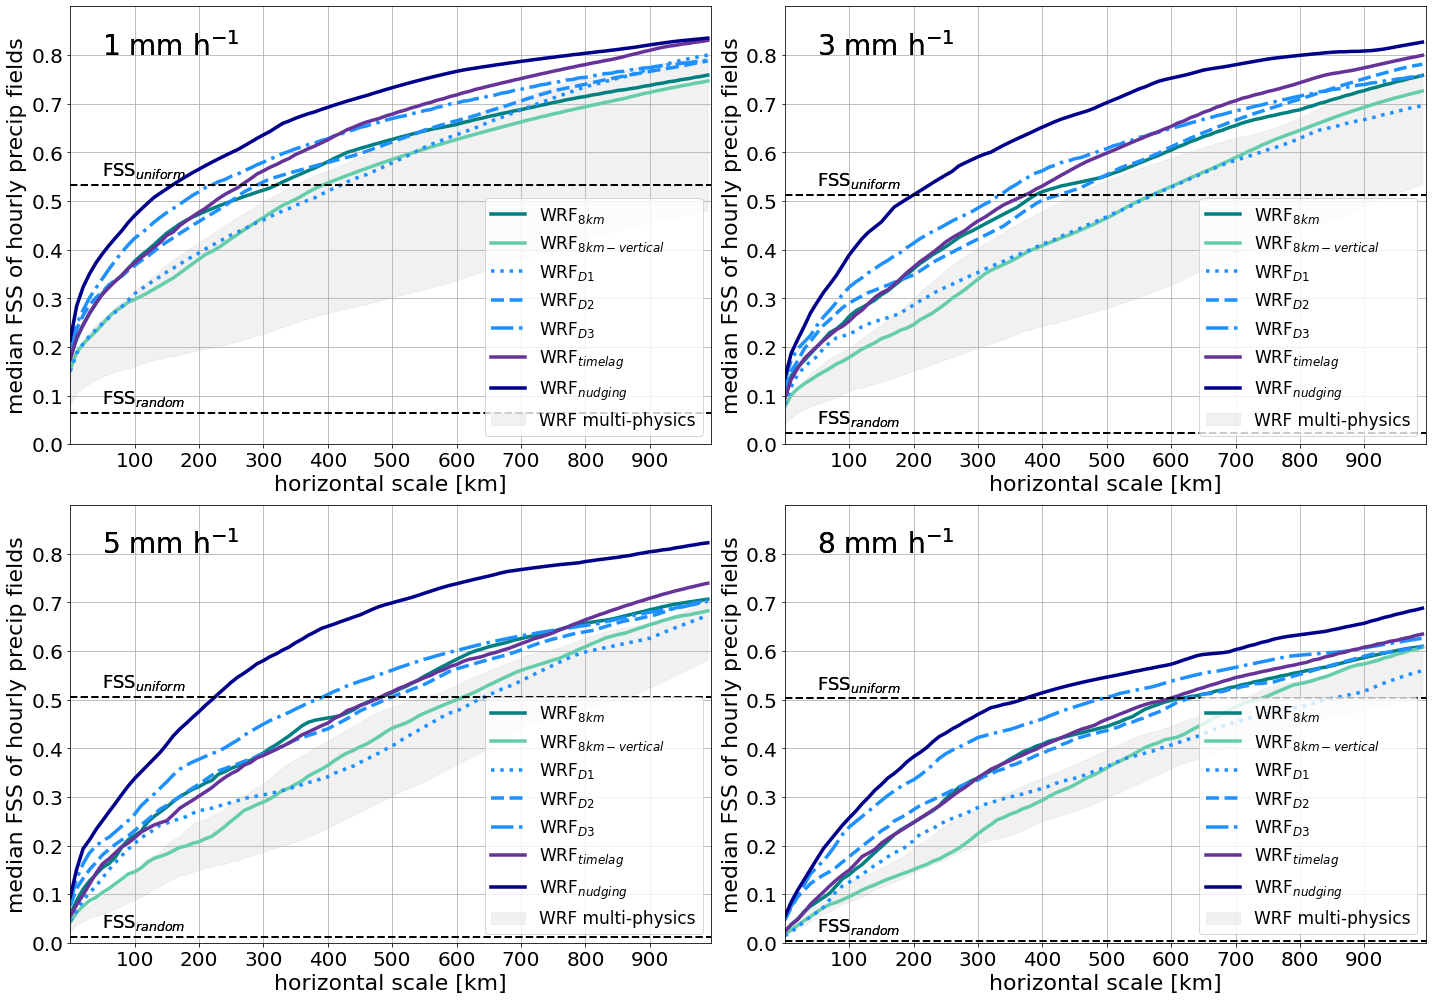

In [11]:
plt.figure(figsize=(20,14))
sp=0
for threshold in [1, 3, 5, 8]:
    sp+=1
    
    # spread for whole WRF ensemble (in total 26)
    fnames= list(Path(path).glob('r1*WRF*'+ str(threshold)+'_20-21.npy'))
    fss_uniform = np.load(path+ str(threshold)+'_FSSuniform.npy')
    fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')
    
    # add lines for additional experiments 
    wrf_fnames= ['WRF8km'+ str(threshold)+'_20-21.npy', 'WRF8km_vertical'+ str(threshold)+'_20-21.npy', 'WRF4km_d01'+ str(threshold)+'_20-21.npy', 'WRF4km_d02'+ str(threshold)+'_20-21.npy',   
                 'WRF4km_5deg'+ str(threshold)+'_20-21.npy', 'WRF4km-timelag'+ str(threshold)+'_20-21.npy', 'WRF4km_spectral'+ str(threshold)+'_20-21.npy']
    make_subplot(threshold, wrf_fnames, sp, ['WRF$_{8km}$','WRF$_{8km-vertical}$', 'WRF$_{D1}$', 'WRF$_{D2}$', 'WRF$_{D3}$','WRF$_{timelag}$','WRF$_{nudging}$'])

    # spread for non-WRF models (in total 6)
    models = [ Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_IAP-CAS-ICON2.6.1P'+ str(threshold) +'_20-21.npy'),
          Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_UIBK-CCLM50n1P'+str(threshold)+'_20-21.npy'),
          Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_PNNL-MPASLA7.0P'+str(threshold)+'_20-21.npy'),
        Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_IITM-RegCM480'+str(threshold)+'_20-21.npy')]
    #plot_spread(threshold, models, sp,  label= 'multi-model', col = 'skyblue',)
    #make_subplot_model(threshold, models, sp, [ 'ICON','CCLM','MPAS-LA', 'RegCM'])
    # add WRF multi-physics spread 
    plot_spread(threshold, fnames, sp, 'WRF multi-physics')
    #plt.title(letter[sp-1], loc = 'left', fontsize = 28)
    plt.grid()
    
    
plt.tight_layout()
plt.show()

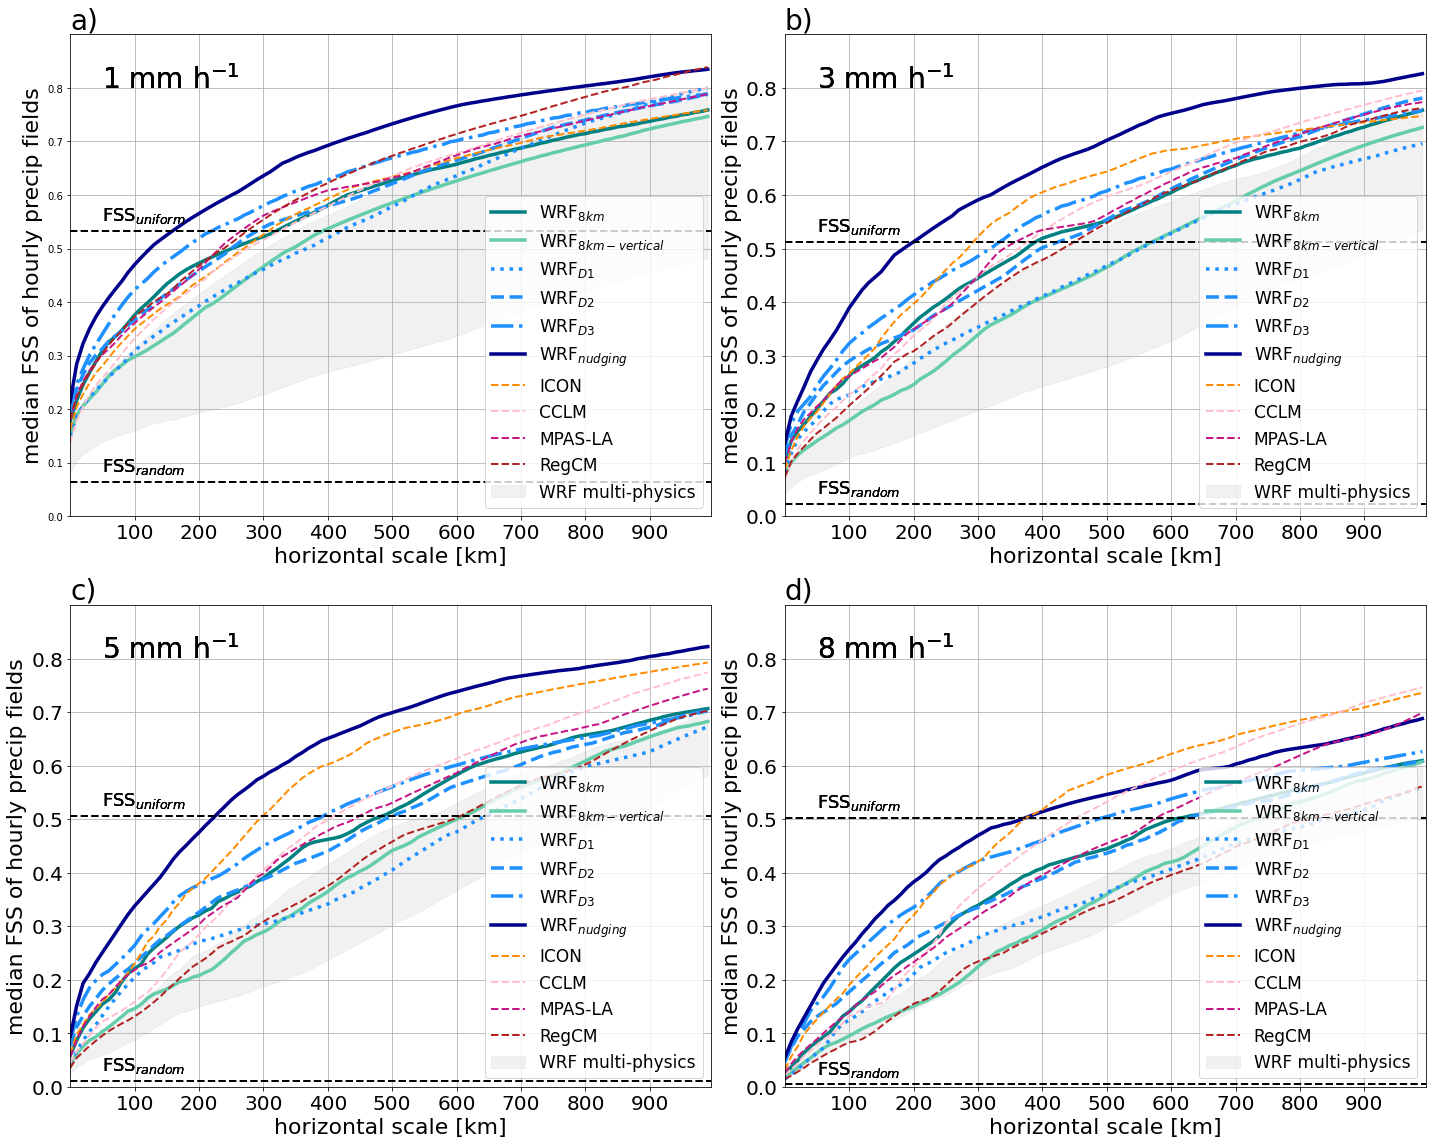

In [6]:
### make figure with one subplot per threshold ### 

fig = plt.figure(figsize=(20,16))
letter = ['a)', 'b)', 'c)', 'd)']
sp=0
for threshold in [1, 3, 5, 8]:
    sp+=1
    
    # spread for whole WRF ensemble (in total 26)
    fnames= list(Path(path).glob('r1*WRF*'+ str(threshold)+'_20-21.npy'))
    fss_uniform = np.load(path+ str(threshold)+'_FSSuniform.npy')
    fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')
    
    # add lines for additional experiments 
    wrf_fnames= ['WRF8km'+ str(threshold)+'_20-21.npy', 'WRF8km_vertical'+ str(threshold)+'_20-21.npy', 'WRF4km_d01'+ str(threshold)+'_20-21.npy', 'WRF4km_d02'+ str(threshold)+'_20-21.npy',   'WRF4km_5deg'+ str(threshold)+'_20-21.npy','WRF4km_spectral'+ str(threshold)+'_20-21.npy']
    make_subplot(threshold, wrf_fnames, sp, ['WRF$_{8km}$','WRF$_{8km-vertical}$', 'WRF$_{D1}$', 'WRF$_{D2}$', 'WRF$_{D3}$','WRF$_{nudging}$'])

    # spread for non-WRF models (in total 6)
    models = [ Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_IAP-CAS-ICON2.6.1P'+ str(threshold) +'_20-21.npy'),
          Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_UIBK-CCLM50n1P'+str(threshold)+'_20-21.npy'),
          Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_PNNL-MPASLA7.0P'+str(threshold)+'_20-21.npy'),
        Path('/glade/u/home/kukulies/metrics/fss/r1i1p1_IITM-RegCM480'+str(threshold)+'_20-21.npy')]
    #plot_spread(threshold, models, sp,  label= 'multi-model', col = 'skyblue',)
    make_subplot_model(threshold, models, sp, [ 'ICON','CCLM','MPAS-LA', 'RegCM'])
    # add WRF multi-physics spread 
    plot_spread(threshold, fnames, sp, 'WRF multi-physics')
    plt.title(letter[sp-1], loc = 'left', fontsize = 28)
    plt.grid()
    
plt.tight_layout()
plt.savefig('fss_ensemble_revised.png', facecolor = 'white', transparent = False)

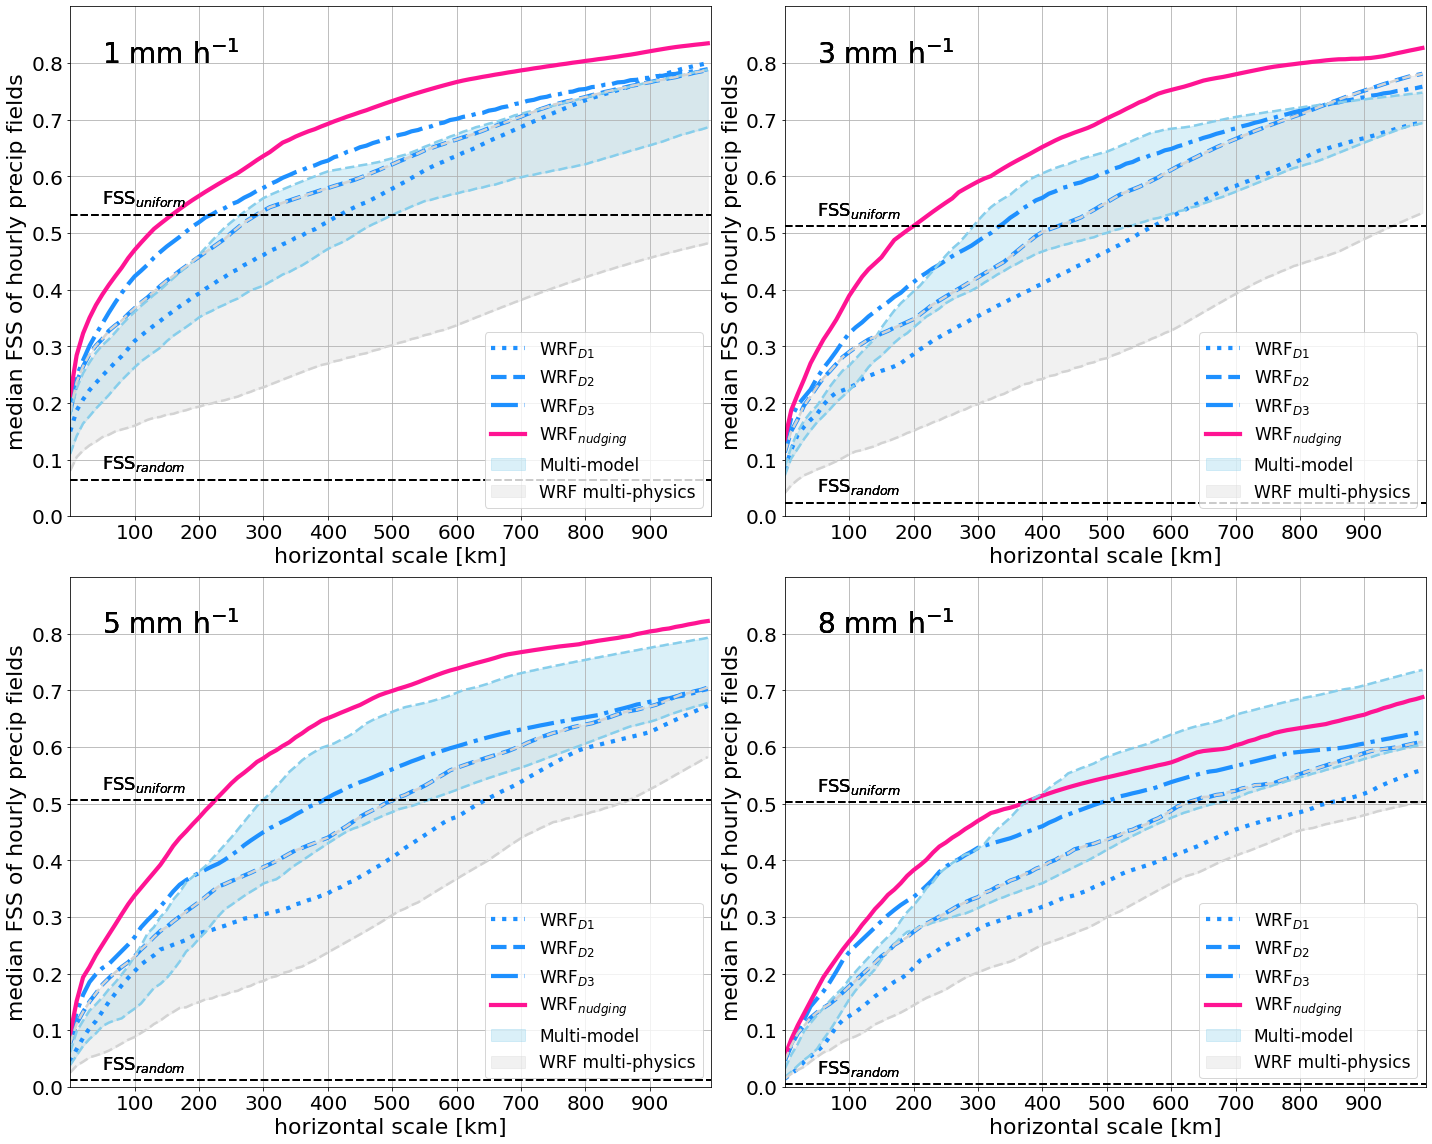

In [14]:
### make figure with one subplot per threshold ### 
from pathlib import Path 
dpath = Path('/glade/scratch/kukulies/')


fig = plt.figure(figsize=(20,16))

sp=0
for threshold in [1, 3, 5, 8]:
    sp+=1    
    # spread for whole WRF ensemble (in total 26)
    fnames= list(Path(path).glob('r1*WRF*'+ str(threshold)+'_20-21.npy'))
    fss_uniform = np.load(path+ str(threshold)+'_FSSuniform.npy')
    fss_random = np.load(path + str(threshold)+'_FSSrandom.npy')
   
    # add lines for additional experiments 
    wrf_fnames= ['WRF4km_d01'+ str(threshold)+'_20-21.npy', 'WRF4km_d02'+ str(threshold)+'_20-21.npy',   'WRF4km_5deg'+ str(threshold)+'_20-21.npy','WRF4km_spectral'+ str(threshold)+'_20-21.npy']
    
    make_subplot(threshold, wrf_fnames, sp, [ 'WRF$_{D1}$', 'WRF$_{D2}$', 'WRF$_{D3}$','WRF$_{nudging}$'])
    
    
    # spread for non-WRF models (in total 6)
    models = [ Path('/glade/scratch/kukulies/data/metrics/fss/r1i1p1_IAP-CAS-ICON2.6.1P'+ str(threshold) +'_20-21.npy'),
          Path(dpath / ('data/metrics/fss/r1i1p1_UIBK-CCLM50n1P'+str(threshold)+'_20-21.npy') ) , 
          Path(dpath / ('data/metrics/fss/r1i1p1_PNNL-MPAS7.0P'+str(threshold)+'_20-21.npy') ) , 
          Path(dpath / ('data/metrics/fss/r1i1p1_PNNL-MPASLA7.0P'+str(threshold)+'_20-21.npy')),  
          Path(dpath / ('data/metrics/fss/r1i3p1_PNNL-MPAS7.0P'+str(threshold)+'_20-21.npy')) ,
          Path(dpath / ('data/metrics/fss/r1i2p1_PNNL-MPAS7.0P'+str(threshold)+'_20-21.npy')) ,]
    
    #models2 = [Path(dpath / ('data/metrics/fss/r1i1p1_PNNL-MPASLA7.0P'+str(threshold)+'_20-21.npy') )]
    #make_subplot_model(threshold, models2, sp, [ 'MPAS'])
    

    # spread for non-WRF models (in total 6)
    plot_spread(threshold, models, sp,  label= 'Multi-model', col = 'skyblue')
    plot_spread(threshold, fnames, sp, label = 'WRF multi-physics', col='lightgrey')
    
    plt.grid()
    
    
plt.tight_layout()
plt.savefig('fss_ensembles2.png', bbox_inches = 'tight', facecolor= 'white', transparent = None)